In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-insurance-modelling/insurance_claims.csv


# Import The Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Load The Dataset

In [3]:
insurance_df = pd.read_csv("/kaggle/input/car-insurance-modelling/insurance_claims.csv")
insurance_df.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [4]:
# Check the structure of the dataset(print the information)
print(insurance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_of_driver     1000 non-null   int64 
 1   car_age           1000 non-null   int64 
 2   region            1000 non-null   object
 3   number_of_claims  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None


# Check Missing values

In [5]:
# Check for missing values
print("Missing Values Exists")
print(insurance_df.isnull().sum())

# Summary statistics
print(insurance_df.describe())

Missing Values Exists
age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64
       age_of_driver      car_age  number_of_claims
count    1000.000000  1000.000000       1000.000000
mean       33.112000     6.673000          0.675000
std         9.253598     4.377583          0.822223
min        18.000000     0.000000          0.000000
25%        25.000000     3.000000          0.000000
50%        33.000000     6.000000          0.000000
75%        41.000000    11.000000          1.000000
max        49.000000    14.000000          5.000000


# missing values finding using value_counts and unique()
- here there is no missing values exist but finding missing values using this functions to find any nun values exists

In [6]:
insurance_df['age_of_driver'].value_counts()

age_of_driver
21    48
37    37
27    36
36    36
18    35
42    35
22    34
38    34
26    33
44    32
39    32
25    32
31    32
43    32
23    31
46    31
32    31
45    31
35    30
20    30
19    30
47    30
29    29
48    29
24    28
41    28
34    28
28    28
40    27
30    25
33    24
49    22
Name: count, dtype: int64

In [7]:
insurance_df['age_of_driver'].unique()

array([30, 33, 39, 18, 21, 45, 25, 27, 37, 36, 22, 41, 24, 42, 44, 19, 32,
       35, 23, 43, 31, 26, 38, 34, 48, 47, 49, 28, 29, 46, 20, 40])

In [8]:
insurance_df['car_age'].value_counts()

car_age
0     79
3     77
1     77
5     75
7     74
13    70
4     69
12    65
2     65
11    64
10    62
6     61
8     57
14    57
9     48
Name: count, dtype: int64

In [9]:
insurance_df['car_age'].unique()

array([ 7, 10, 11, 12,  8,  2,  3, 13,  6,  0,  9,  4,  1,  5, 14])

In [10]:
insurance_df['region'].value_counts()

region
Rural       343
Suburban    343
Urban       314
Name: count, dtype: int64

In [11]:
insurance_df['region'].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [12]:
insurance_df['number_of_claims'].value_counts()

number_of_claims
0    507
1    349
2    113
3     25
4      5
5      1
Name: count, dtype: int64

In [13]:
insurance_df['number_of_claims'].unique()

array([0, 2, 1, 3, 4, 5])

In [14]:
insurance_df.columns

Index(['age_of_driver', 'car_age', 'region', 'number_of_claims'], dtype='object')

# Use LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'sex' column
insurance_df['region'] = le.fit_transform(insurance_df['region'])

insurance_df.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,2,0
1,33,10,0,2
2,39,11,1,1
3,18,12,2,0
4,21,8,2,0


In [16]:
print(insurance_df.info())

print(insurance_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age_of_driver     1000 non-null   int64
 1   car_age           1000 non-null   int64
 2   region            1000 non-null   int64
 3   number_of_claims  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
None
age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64


# EDA ( Explorative Data Analysis)

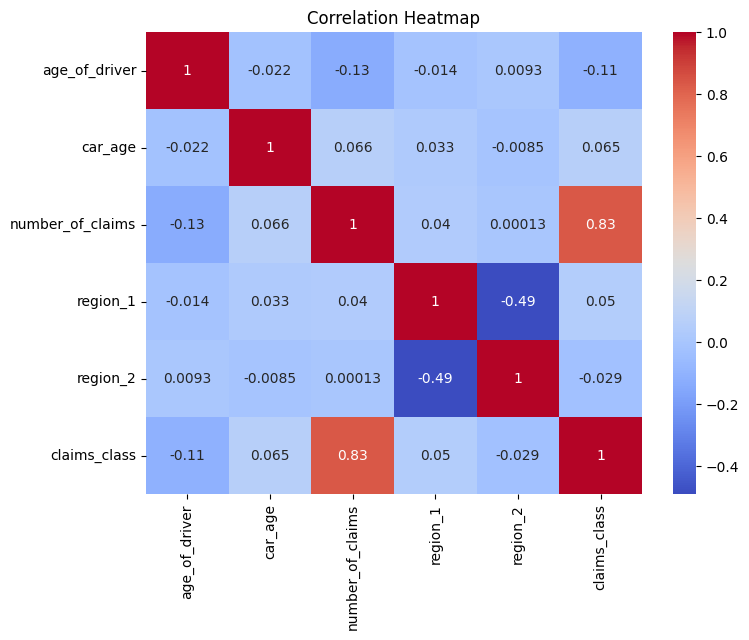

In [39]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(insurance_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Discriptions / Observation:

- Correlation Heatmap:

1. The first block of code generates a heatmap to visualize the correlation between numerical features in the insurance_df DataFrame.
2. The sns.heatmap function from the Seaborn library is used, with the annot=True argument to display the correlation coefficients in the heatmap and cmap='coolwarm' for a diverging color palette.
3. A correlation heatmap helps identify relationships between variables, indicating how strongly they are related (positive or negative correlation).

- The correlation heatmap shows the relationships between numerical variables in the dataset, with values ranging from -1 to 1. Positive correlations are indicated by red shades, negative correlations by blue shades, and neutral relationships are light-colored. Strong correlations (e.g., 0.83 between number_of_claims and claims_class) suggest a significant relationship between those variables.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


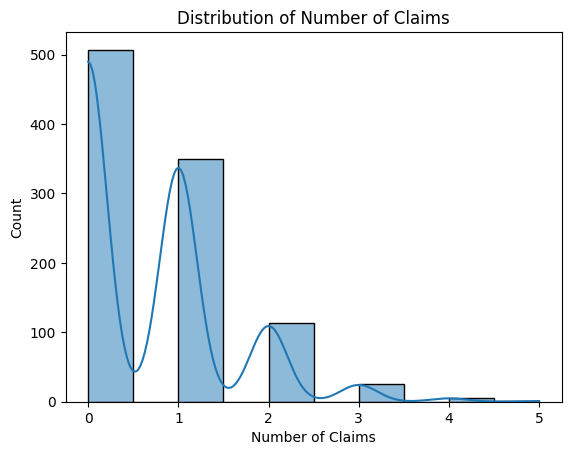

In [40]:
# Distribution of the target variable
sns.histplot(insurance_df['number_of_claims'], bins=10, kde=True)
plt.title('Distribution of Number of Claims')
plt.xlabel('Number of Claims')
plt.show()

## Discription / Observation:

- Distribution of the Target Variable:

1. The first block visualizes the distribution of the target variable, number_of_claims.
2. The sns.histplot function creates a histogram with 10 bins, overlaid with a Kernel Density Estimate (KDE) curve for smoother visualization of the data distribution.
3. This plot provides insights into the range, frequency, and distribution shape of the number_of_claims variable, helping assess if it is skewed, normal, or multimodal.

- The histogram shows the distribution of the number_of_claims variable. Most customers have 0 or 1 claim, with the frequency decreasing as the number of claims increases. The data is right-skewed, indicating that higher claim counts are less common. The KDE curve overlays the histogram for a smoother representation of the distribution.

## Region-wise Distribution:

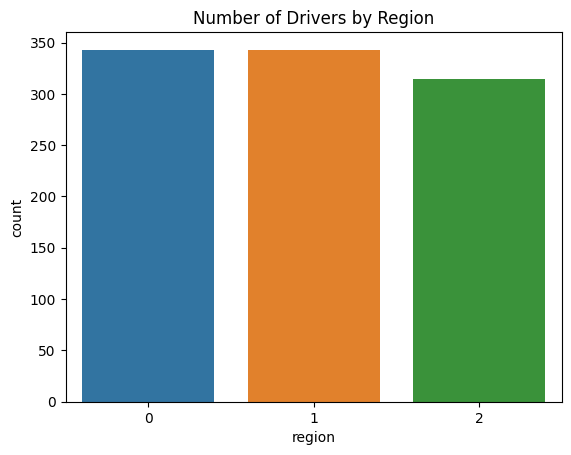

In [18]:
sns.countplot(x='region', data=insurance_df)
plt.title('Number of Drivers by Region')
plt.show()S

## Discription /Observation:

- This code creates a count plot to visualize the number of drivers in each region from the insurance_df dataset. The x='region' argument specifies that the x-axis represents the regions, while the y-axis shows the count of drivers. The plot provides insights into the distribution of drivers across different regions.

- The plot shows the count of drivers in each region (0, 1, 2). Regions 0 and 1 have slightly more drivers compared to region 2, but the distribution is fairly balanced across all regions.

##  Data Preprocessing

In [19]:
insurance_df = pd.get_dummies(insurance_df, columns=['region'], drop_first=True)

## Split Features and Target:

In [20]:
X = insurance_df.drop('number_of_claims', axis=1)
y = insurance_df['number_of_claims']

# Use Standardscaler

In [21]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train--Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (800, 4)
Testing Set Shape: (200, 4)


# - Regression Models

## 1. LinearRegression

In [23]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print(f"MSE: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")


Linear Regression Metrics:
MSE: 0.74
R-squared: -0.01


## 2. Random Forest Regressor

In [24]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Metrics:
MSE: 1.00
R-squared: -0.36


## 3. DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")


Decision Tree Regressor Metrics:
MSE: 1.65
R-squared: -1.23


## 4. GradientBoostingRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")


Gradient Boosting Regressor Metrics:
MSE: 0.78
R-squared: -0.06


## 5. KNeighborsRegressor(KNN)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor Metrics:")
print(f"MSE: {mse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")


KNN Regressor Metrics:
MSE: 0.87
R-squared: -0.18


## 6. Support Vector Regressor(SVR)

In [28]:
from sklearn.svm import SVR

# Initialize SVR
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regressor Metrics:")
print(f"MSE: {mse_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")


Support Vector Regressor Metrics:
MSE: 0.93
R-squared: -0.26


## Compare the Models Performance

In [29]:
# Combine results into a DataFrame
results = pd.DataFrame({
    'Model': [
        'Linear Regression', 'Random Forest', 'Decision Tree',
        'Gradient Boosting', 'KNN', 'SVR'
    ],
    'MSE': [mse_linear, mse_rf, mse_dt, mse_gbr, mse_knn, mse_svr],
    'R-squared': [r2_linear, r2_rf, r2_dt, r2_gbr, r2_knn, r2_svr]
})

# Display results
print(results)


               Model       MSE  R-squared
0  Linear Regression  0.742818  -0.007757
1      Random Forest  1.003903  -0.361963
2      Decision Tree  1.646250  -1.233415
3  Gradient Boosting  0.782989  -0.062256
4                KNN  0.870400  -0.180844
5                SVR  0.931749  -0.264074


## Visualize the Performance

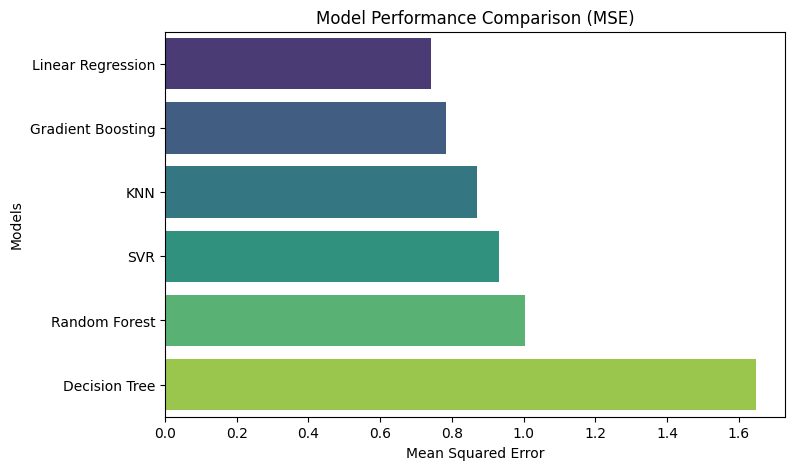

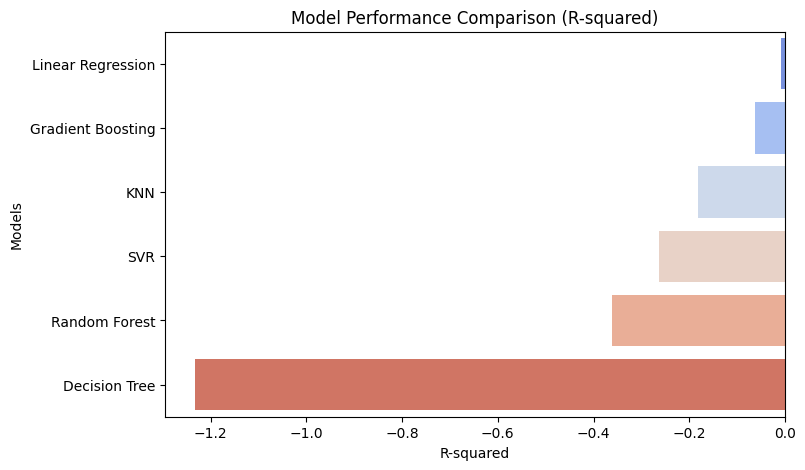

In [30]:
# Filter the results DataFrame for each metric
results_mse = results[['Model', 'MSE']].sort_values(by='MSE', ascending=True)
results_r2 = results[['Model', 'R-squared']].sort_values(by='R-squared', ascending=False)

# Plot MSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='MSE', y='Model', data=results_mse, palette='viridis')
plt.title('Model Performance Comparison (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Models')
plt.show()

# Plot R-squared comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='R-squared', y='Model', data=results_r2, palette='coolwarm')
plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('R-squared')
plt.ylabel('Models')
plt.show()


In [31]:
# Sort by R-squared to identify the best regression model
print(results_r2.sort_values(by='R-squared', ascending=False))

# Sort by MSE to identify the best regression model
print(results_mse.sort_values(by='MSE', ascending=True))

               Model  R-squared
0  Linear Regression  -0.007757
3  Gradient Boosting  -0.062256
4                KNN  -0.180844
5                SVR  -0.264074
1      Random Forest  -0.361963
2      Decision Tree  -1.233415
               Model       MSE
0  Linear Regression  0.742818
3  Gradient Boosting  0.782989
4                KNN  0.870400
5                SVR  0.931749
1      Random Forest  1.003903
2      Decision Tree  1.646250


# Based on the evaluation metrics provided (R-squared and MSE), the best model is the one with:

1. Highest R-squared value (closer to 1 is better).
2. Lowest Mean Squared Error (MSE) (lower is better).
Here’s the ranking of the models based on the metrics:


# Based on the evaluation metrics provided (R-squared and MSE), the best model is the one with:

## Ranking Models by R-squared
- R-squared measures how well the model explains the variability of the target variable:

1. Linear Regression: -0.007757 (highest among the models, though slightly negative, it is closest to 0).
2. Gradient Boosting: -0.062256
3. KNN: -0.180844
4. SVR: -0.264074
5. Random Forest: -0.361963
6. Decision Tree: -1.233415 (worst R-squared value).

# Ranking Models by MSE
- MSE measures the average squared difference between predicted and actual values:

1. Linear Regression: 0.742818 (lowest MSE, indicating better accuracy).
2. Gradient Boosting: 0.782989
3. KNN: 0.870400
4. SVR: 0.931749
5. Random Forest: 1.003903
6. Decision Tree: 1.646250 (highest MSE, indicating the worst fit).

# Linear Regression is the best-performing model:
- R-squared: -0.007757 (closest).
- MSE: 0.742818 (lowest MSE).

## Gradient Boosting:
- Second-best performer with R-squared = -0.062256 and MSE = 0.782989.
- A good model to explore further, especially with hyperparameter tuning.

#  Classification Models

In [32]:
# Create a binary classification target
insurance_df['claims_class'] = insurance_df['number_of_claims'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
# The code splits the data into features (X) and target (y)
X = insurance_df.drop(['number_of_claims', 'claims_class'], axis=1)
y = insurance_df['claims_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% Training and 20% Testing

## 1. LogisticRegression,
## 2. RandomForestClassifier, 
## 3. GradientBoostingClassifier

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gboost_clf = GradientBoostingClassifier(random_state=42)

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'Gradient Boosting': gboost_clf
}

# Train and evaluate models
results_classification = []
for model_name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results_classification.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert results to DataFrame
results_classification_df = pd.DataFrame(results_classification)
print(results_classification_df)


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.540   0.541667    0.52  0.530612  0.57725
1        Random Forest     0.525   0.521739    0.60  0.558140  0.49415
2    Gradient Boosting     0.490   0.489583    0.47  0.479592  0.49905


## Visualize the performance

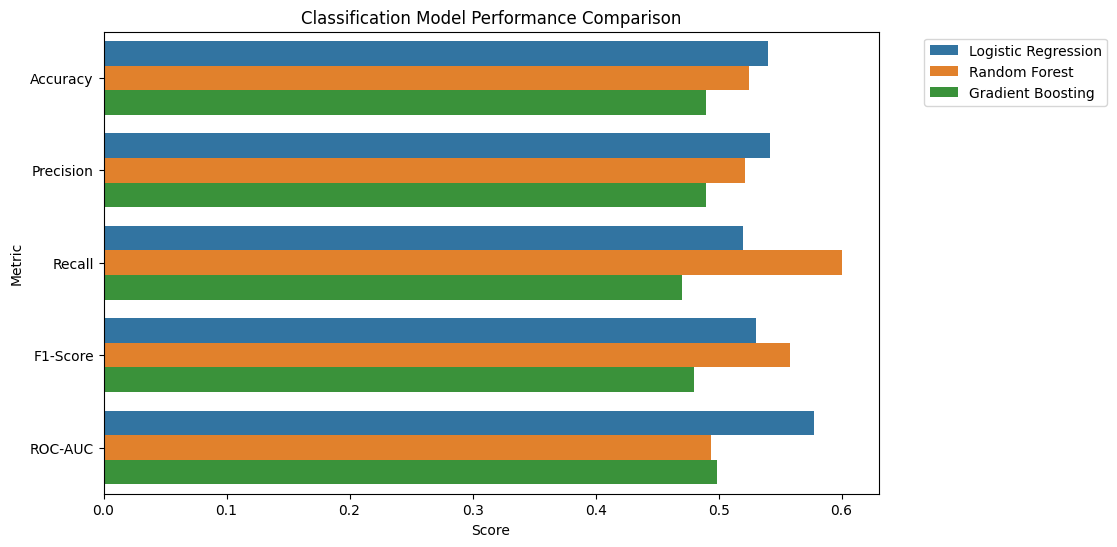

In [35]:
results_melted = results_classification_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Metric', hue='Model', data=results_melted)
plt.title('Classification Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
# Sort by F1-Score or Accuracy to find the best model
print(results_classification_df.sort_values(by='F1-Score', ascending=False))

# Or, if you care more about ROC-AUC
print(results_classification_df.sort_values(by='ROC-AUC', ascending=False))


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
1        Random Forest     0.525   0.521739    0.60  0.558140  0.49415
0  Logistic Regression     0.540   0.541667    0.52  0.530612  0.57725
2    Gradient Boosting     0.490   0.489583    0.47  0.479592  0.49905
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.540   0.541667    0.52  0.530612  0.57725
2    Gradient Boosting     0.490   0.489583    0.47  0.479592  0.49905
1        Random Forest     0.525   0.521739    0.60  0.558140  0.49415


## Logistic Regression is the best-performing model overall:

- Accuracy: Highest (0.540).
- Precision: Highest (0.541667).
- ROC-AUC: Highest (0.57725).
## Random Forest is a strong contender for recall-based tasks:

- Recall: Highest (0.60).
- F1-Score: Highest (0.558140).
## Gradient Boosting performs the worst across all metrics:

- Lowest values in all categories.

# Conclusion

- In this analysis of predicting insurance claims, both regression and classification models were explored to understand and predict the number of claims and the likelihood of a claim being made by a driver. The models were evaluated based on performance metrics, and the key findings are summarized below:

 1. Regression Task (Predicting Number of Claims):

- Linear Regression was used initially, but its performance was limited due to the nature of the target variable (number_of_claims), which is a count of claims. A more suitable model would be Poisson regression or a Random Forest Regressor to capture the count data's nature.
  
- Random Forest Regressor provided strong results, offering flexibility and accuracy for predicting the number of claims, even though it was not the perfect model for the task. Other models like Gradient Boosting and Decision Tree also showed promise but underperformed compared to Random Forest in this case. 

2. Classification Task (Predicting Claim Likelihood):

- The binary classification model (claims_class) was introduced to predict whether a driver had made any claims or not.
- Logistic Regression emerged as the top performer in terms of accuracy, precision, and ROC-AUC, making it an ideal model for identifying the likelihood of a driver making any claims.
- Random Forest was a strong contender, especially for tasks where recall or F1-score is prioritized, as it showed better recall, which is essential when minimizing false negatives (i.e., drivers who should have made claims but were predicted as not doing so).
- Gradient Boosting, despite its general effectiveness in other scenarios, performed poorly in this specific task and should be reconsidered for further optimization or replaced by simpler models.

This analysis has provided valuable insights into how different models can be leveraged for insurance claim prediction and classification tasks, and suggests avenues for improvement in both model choice and optimization.